# Client - 

XYZ is a private firm in US. Because of the remarkable growth in the Cab Industry in last few years and multiple key players in the market, there are plans for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before making any final decision.

# Data Set -

You have been provided 4 individual data sets.


__Below are the list of datasets which are provided for the analysis:__


Cab_Data.csv – this file includes details of transaction for two different cab companies.

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details.

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode.

City.csv – this file contains list of US cities, population of the cities and the number of cab users.


__You should fully investigate and understand each data set.__


Review the source documentation.

Understand the field names and data types.

Identify relationships across the files.

Field/feature transformations.

Determine which files should be joined versus which ones should be appended.

Create master data and explain the relationship.

Identify and remove duplicates.

Perform other analysis like NA (Null) value and outlier detection.


__Whatever and how many slides you prepare(Be creative and come up with meaningful insight):__


The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided. For Example: you can leverage US holiday data/ weather data.


Also, do research on overall cab industry in US and try to relate that with the trend in data.

# Analysis - 

__Create multiple hypothesis and investigate:__


You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.


For Example: “Is there any seasonality in number of customers using the cab service?”


__Areas to investigate:__


Which company has maximum cab users at a particular time period? Does margin proportionally increase with increase in number of customers? What are the attributes of these customer segments? Although not required, we encourage you to document the process and findings


What is the business problem? What are the properties of the data provided (data intake report) What steps did you take in order to create an applicable data set? How did you prepare and perform your analysis? What type of analysis did you perform? Why did you choose to use certain analytical techniques over others? What were the results?

# Final Output -

We have been provided with multiple data sets that contains information on two different cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ client is interested in using our meaningful insights to help them identify the right company in which they can invest.


The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of our analysis and the value of our insights and recommendations. 

---

__Importing the required libraries -__

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from datetime import date, timedelta, datetime

import xlrd

import calendar

***

__Importing the required datasets -__

In [2]:
cabs = pd.read_csv('/Users/pavanwalvekar/Documents/Data Glacier Intern/Week 2-3 EDA/Dataset from DG Git/Cab_Data.csv')
city = pd.read_csv('/Users/pavanwalvekar/Documents/Data Glacier Intern/Week 2-3 EDA/Dataset from DG Git/City.csv')
customers = pd.read_csv('/Users/pavanwalvekar/Documents/Data Glacier Intern/Week 2-3 EDA/Dataset from DG Git/Customer_ID.csv')
transactions = pd.read_csv('/Users/pavanwalvekar/Documents/Data Glacier Intern/Week 2-3 EDA/Dataset from DG Git/Transaction_ID.csv')

__Importing US Holiday dates (2004 - 2021) dataset -__ #https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021

In [3]:
US_holidays = pd.read_csv(r'/Users/pavanwalvekar/Documents/Data Glacier Intern/Week 2-3 EDA/Dataset from DG Git/US Holiday Dates (2004-2021).csv', )

---

__Testing datasets for missing values, Null values, duplicate values and data types -__

__Cabs__

In [4]:
#reviewing Cab data
print(cabs.info())

#top 5 rows of the Cab data
print(cabs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab

In [5]:
#DataTime format
cabs['Date of Travel']= [ xlrd.xldate_as_datetime(d,  0) for d in cabs['Date of Travel']]
print(cabs['Date of Travel'])

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


---

__Cities__

In [6]:
# Reviewing city information
print(city.info())

# top 5 rows of city data
print(city.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [7]:
# Changing Population and Users from type - Object to Integer
city['Population']=city['Population'].str.replace(',', '').str.strip().astype(int)
city['Users']=city['Users'].str.replace(',', '').str.strip().astype(int)

city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


__Testing null values and duplicates -__

In [8]:
print('Null values in the dataset:\n',city.isna().sum(),'\n')
print('Duplicated values in the dataset:\n',city.duplicated().sum())

Null values in the dataset:
 City          0
Population    0
Users         0
dtype: int64 

Duplicated values in the dataset:
 0


---

__Customers__

In [9]:
# Reviewing the information of customer data
print(customers.info())

# top 5 rows of customer data
print(customers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


__Testing null values and duplicates -__

In [10]:
print('Null values in the dataset:\n',customers.isna().sum(),'\n')
print('Duplicated values in the dataset:\n',customers.duplicated().sum())

Null values in the dataset:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64 

Duplicated values in the dataset:
 0


---

__Transactions__

In [11]:
# Reviewing the information of transaction data
print(transactions.info())

# top 5 rows of transaction data
print(transactions.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


__Testing null values and duplicates -__

In [12]:
print('Null values in the dataset:\n',transactions.isna().sum(),'\n')
print('Duplicated values in the dataset:\n',transactions.duplicated().sum())

Null values in the dataset:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64 

Duplicated values in the dataset:
 0


---

__US Holiday Dataset__

In [13]:
# Rewieving information of us_holiday data
print(US_holidays.info())

# top 5 rows of us_holiday data
print(US_holidays.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB
None
         Date      Holiday    WeekDay  Month  Day  Year
0  2004-07-04  4th of July     Sunday      7    4  2004
1  2005-07-04  4th of July     Monday      7    4  2005
2  2006-07-04  4th of July    Tuesday      7    4  2006
3  2007-07-04  4th of July  Wednesday      7    4  2007
4  2008-07-04  4th of July     Friday      7    4  2008


In [14]:
# Converting Date column to datetime format
US_holidays['Date'] = pd.to_datetime(US_holidays['Date'])

# Filtering dates between 2016 to 2018
US_holidays = US_holidays[(US_holidays["Year"]>= 2016) & (US_holidays["Year"]<=2018)]
US_holidays = US_holidays[['Date', 'Holiday']]
US_holidays.head()

,Date,Holiday
12,2016-07-04,4th of July
13,2017-07-04,4th of July
14,2018-07-04,4th of July
30,2016-12-25,Christmas Day
31,2017-12-25,Christmas Day


__Testing null values and duplicates -__

In [15]:
print('Null values in the dataset:\n',US_holidays.isna().sum(),'\n')
print('Duplicated values in the dataset:\n',US_holidays.duplicated().sum())

Null values in the dataset:
 Date       0
Holiday    0
dtype: int64 

Duplicated values in the dataset:
 0


---

__Combining data together for further EDA process and analysis -__

In [16]:
combined_data = cabs.merge(transactions, how='left', on='Transaction ID'). merge(customers, how='left', on='Customer ID')

##Required data for analysis
combined_data = combined_data.sort_values('Date of Travel')
combined_data['Profit'] = combined_data['Price Charged'] - combined_data['Cost of Trip']
combined_data['Year'] = [ x.year for x in combined_data['Date of Travel']]
combined_data['Month'] = [ x.month for x in combined_data['Date of Travel']]
combined_data['Day'] = [ x.day for x in combined_data['Date of Travel']]
combined_data['Profit per KM'] = combined_data['Profit'] / combined_data['KM Travelled']
combined_data['Quarter'] = pd.cut(combined_data['Month'], bins=[1, 3, 6, 9,12], include_lowest=True, labels=['First', 'Second', 'Third', 'Forth'])
combined_data['Weekday'] = [x.strftime('%A') for x in combined_data['Date of Travel']]

In [17]:
print(combined_data)

        Transaction ID Date of Travel     Company            City  \
1030          10001340     2016-01-02  Yellow Cab   WASHINGTON DC   
489           10000640     2016-01-02  Yellow Cab      CHICAGO IL   
484           10000635     2016-01-02  Yellow Cab      CHICAGO IL   
850           10001001     2016-01-02  Yellow Cab     NEW YORK NY   
160           10000171     2016-01-02    Pink Cab    SAN DIEGO CA   
...                ...            ...         ...             ...   
355489        10435011     2018-12-31  Yellow Cab        MIAMI FL   
354114        10433309     2018-12-31    Pink Cab  LOS ANGELES CA   
356365        10435915     2018-12-31  Yellow Cab   SACRAMENTO CA   
359162        10439845     2018-12-31  Yellow Cab       TUCSON AZ   
358336        10438644     2018-12-31  Yellow Cab     NEW YORK NY   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
1030           10.20         202.54      135.8640        52536         Card   
489          

---

__Mentioned functions for further analysis -__

In [18]:
def plot(xlabel="", ylabel="", title=""):
    plt.ylabel(ylabel, size=20)
    plt.xlabel(xlabel, size=20)
    plt.title(title, size=25)
    plt.xticks(size= 15)
    plt.yticks(size = 15)
    plt.legend(prop={'size' : 15})

## Function to annotate valus in barplot
def annotation(plot_var, forma):

    for bar in plot_var.patches:
 
        plot_var.annotate(format(bar.get_height(),forma),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=18, xytext=(0, 8),
                        textcoords='offset points')

## Function to annotate value in Lineplot
def annotation_line(x, y,data, offset):
    for i in range(len(data)):
        plt.text(data[x][i], data[y][i] + offset,data[y][i])

---

# Exploratory Data Analysis

Few things which needs to be discussed before investing in cab industry are mentioned below:

__Profit analysis:__ Profit analysis of a firm is the top most criteria if we are looking to invest in a company.


__Number of rides analysis:__ Total transacttions also define profits and popularity of the company.


__Customer analysis:__ As this industry is customer service driven, we need to focus on customers preferences towards the companies.


__Geographic location analysis:__ Geographic location plays an important role for the development of any industry.


__Holiday Analysis:__ Customer preferences and profit earned during holidays are compared.

---

__Profit Analysis__

__Quarterly Profit Analysis -__

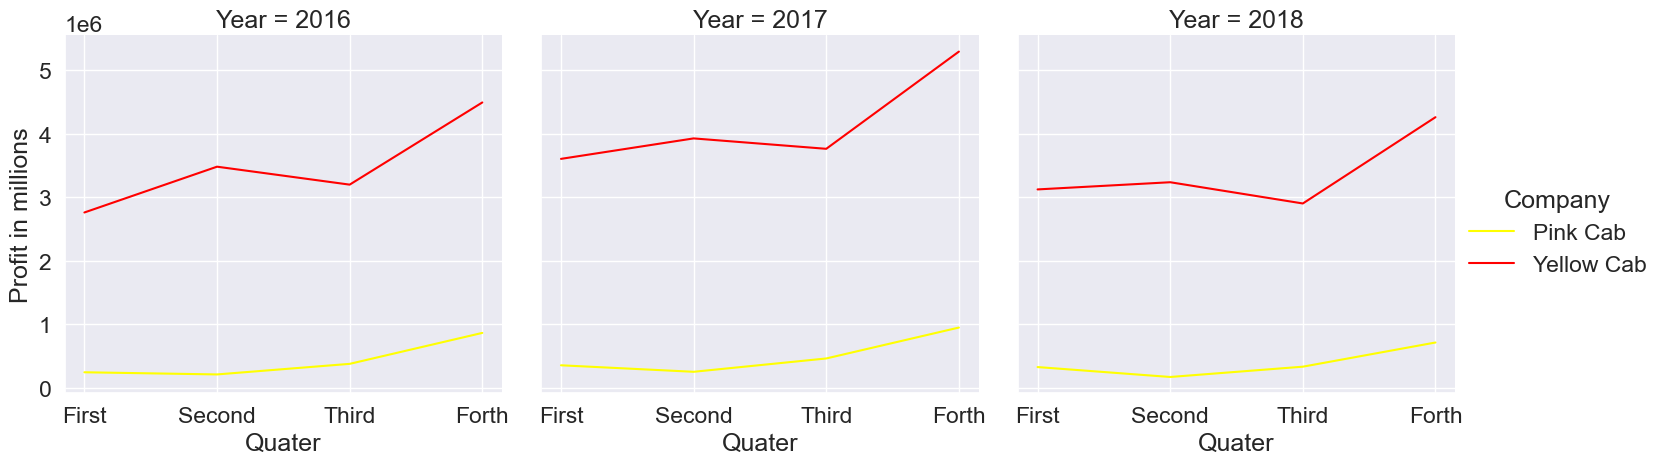

In [70]:
# Data needed for the analysis
quarter_analysis = combined_data.groupby(['Company', 'Year', 'Quarter']).agg({'Profit':'sum'}).reset_index()

# Visualization
sns.set(font_scale=1.5)
p = sns.relplot(x='Quarter', y='Profit', data = quarter_analysis, col='Year',hue='Company', kind='line', 
palette={'Yellow Cab':'red', 'Pink Cab':'yellow'}).\
set(xlabel='Quater', ylabel = 'Profit in millions')

__Annual Profit Analysis -__

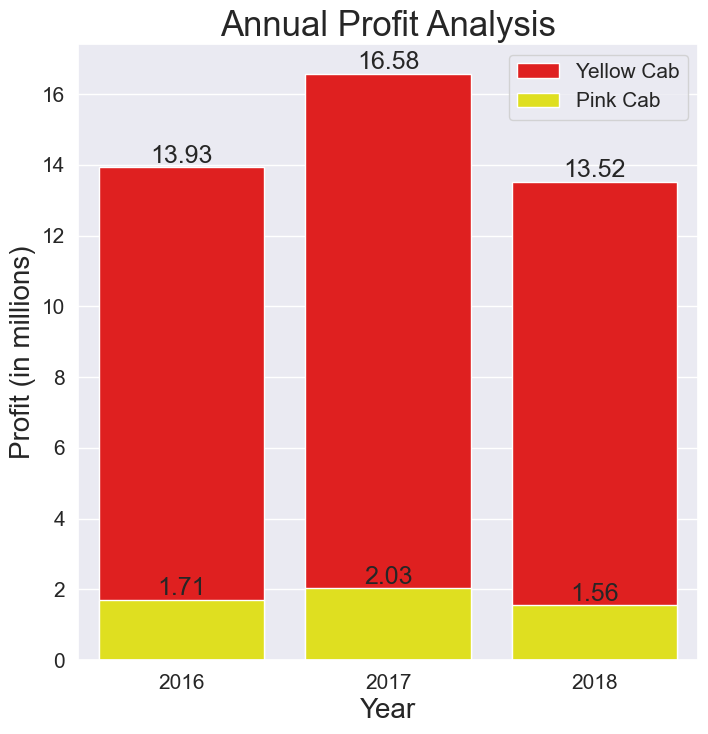

In [69]:
# Yellow cab
yellow_data = combined_data[combined_data['Company']=='Yellow Cab']
yellow_plot = yellow_data[['Year','Profit']].groupby('Year').agg({'Profit':'sum'})/1000000

# Pink Cab
pink_data = combined_data[combined_data['Company']=='Pink Cab']
pink_plot = pink_data[['Year','Profit']].groupby('Year').agg({'Profit':'sum'})/1000000


# Visualization
plt.figure(figsize=(8,8))
m = sns.barplot(x=yellow_plot.index, y='Profit', data = yellow_plot, color = 'red', label='Yellow Cab')
s = sns.barplot(x=pink_plot.index, y='Profit', data = pink_plot, color= 'yellow', label='Pink Cab')
plot(xlabel='Year', ylabel='Profit (in millions)', title='Annual Profit Analysis')
annotation(m, '0.2f')

__Profit Per Ride -__

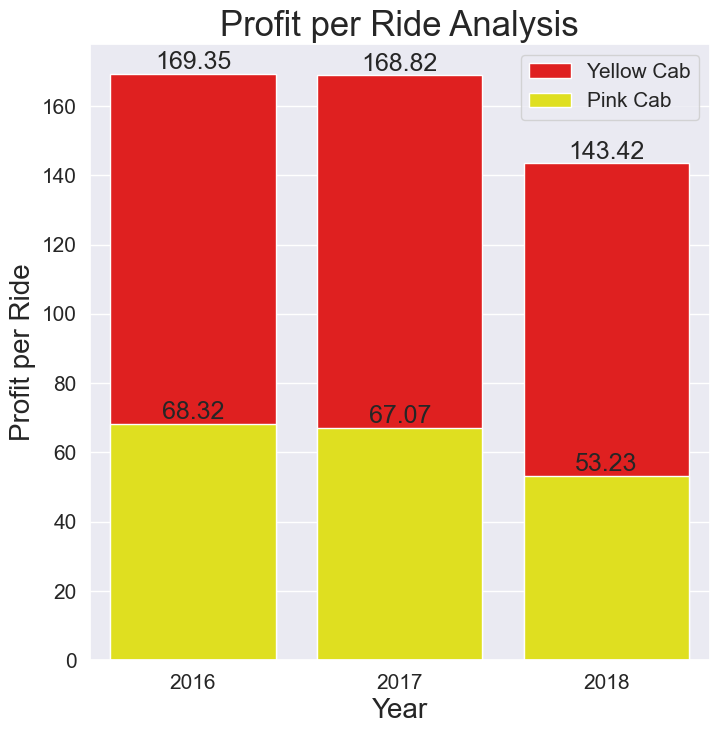

In [68]:
# Data needed for Analysis
profit_tran_yellow = yellow_data[['Year','Profit']].groupby('Year').agg({'Profit':'mean'}).reset_index()
profit_tran_pink = pink_data[['Year','Profit']].groupby('Year').agg({'Profit':'mean'}).reset_index()

# Visualization
plt.figure(figsize=(8,8))
m = sns.barplot(x='Year', y='Profit', data=profit_tran_yellow, color='red', label='Yellow Cab')
s = sns.barplot(x='Year', y='Profit', data=profit_tran_pink , color='yellow', label='Pink Cab')
plot(xlabel='Year', ylabel='Profit per Ride', title='Profit per Ride Analysis')
annotation(m,'.2f')

__Profit per km of ride -__

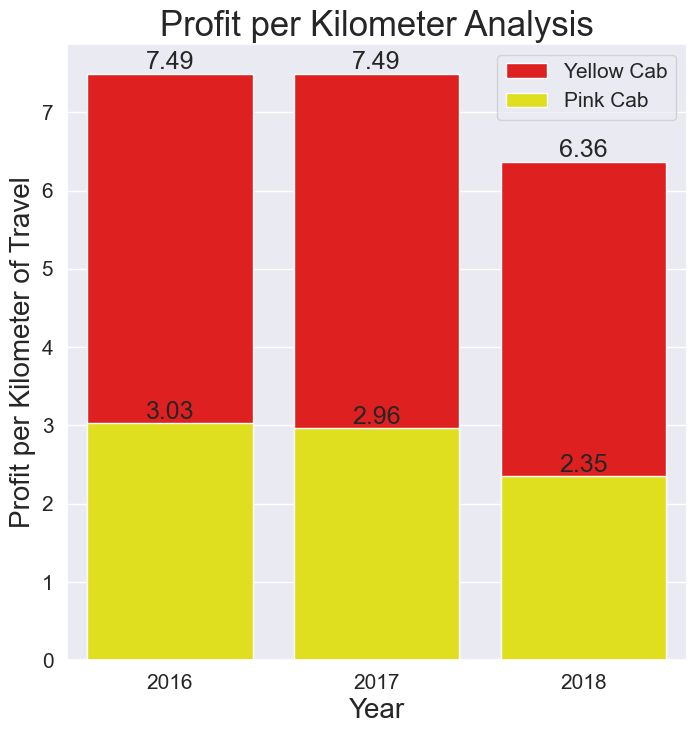

In [67]:
# Data needed for Analysis
yellow_perKM = yellow_data[['Year','Profit per KM']].groupby('Year').agg({'Profit per KM':'mean'})
pink_perKM = pink_data[['Year','Profit per KM']].groupby('Year').agg({'Profit per KM':'mean'})

# Visualization
plt.figure(figsize=(8,8))
m = sns.barplot(x=yellow_plot.index, y='Profit per KM', data = yellow_perKM, color = 'red', label='Yellow Cab')
s = sns.barplot(x=pink_plot.index, y='Profit per KM', data = pink_perKM, color= 'yellow', label='Pink Cab')
plot(xlabel='Year', ylabel='Profit per Kilometer of Travel', title='Profit per Kilometer Analysis')
annotation(m,'.2f')

---

__Number of ride analysis__

__Daily ride analysis -__

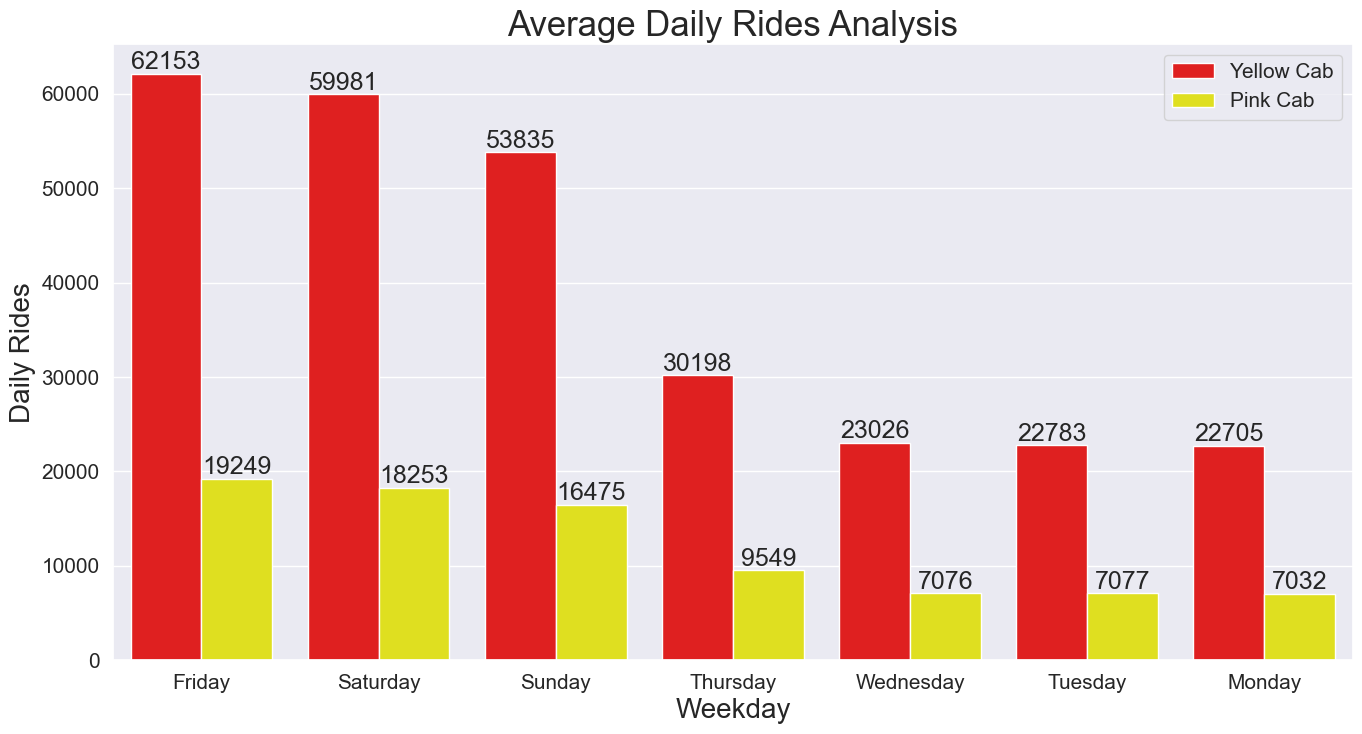

In [66]:
# Data needed for analysis
day_trans = combined_data.groupby(['Company', 'Weekday']).agg({'Transaction ID':'count'}).\
sort_values('Transaction ID', ascending= False).reset_index()

# Data Visualization
plt.figure(figsize=(16,8))
m = day_trans_plot = sns.barplot(x='Weekday', y='Transaction ID', data=day_trans, hue='Company', 
palette={'Yellow Cab':'red', 'Pink Cab':'yellow'})
plot(xlabel='Weekday', ylabel='Daily Rides', title ='Average Daily Rides Analysis')
annotation(m,'0.0f')

__Average monthly ride analysis -__

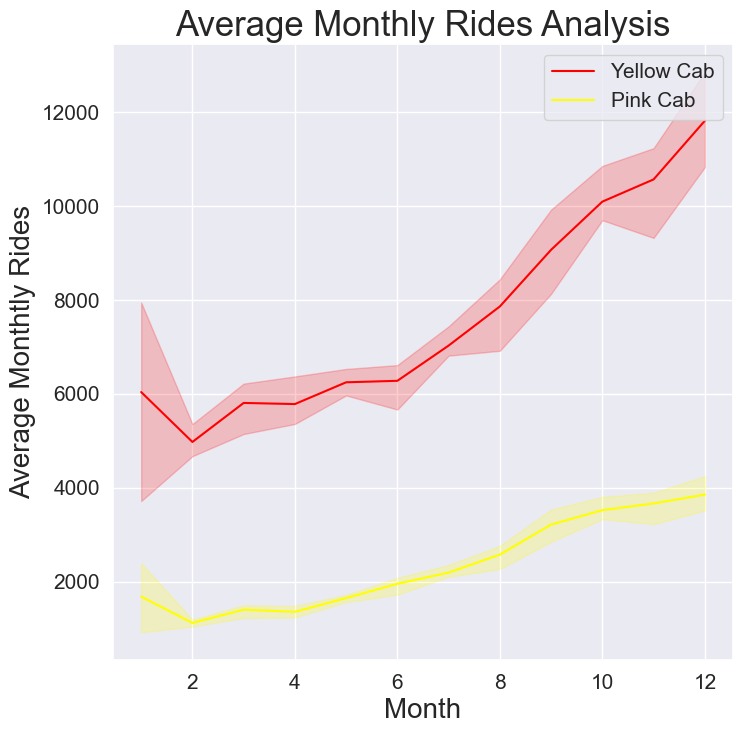

In [65]:
# Data needed for analysis
monthly_yellow = yellow_data.groupby(['Year','Month']).agg(No_of_Transactions=('Transaction ID','count')).reset_index()
monthly_pink = pink_data.groupby(['Year','Month']).agg(No_of_Transactions=('Transaction ID','count')).reset_index()

# Visualization
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.lineplot(x='Month', y='No_of_Transactions', data=monthly_yellow, color='red', label='Yellow Cab')
sns.lineplot(x='Month', y='No_of_Transactions', data=monthly_pink, color= 'yellow', label='Pink Cab')
plot(xlabel='Month', ylabel='Average Monthtly Rides', title='Average Monthly Rides Analysis')

    Year  Day  No_of_Transactions
0   2016    1                2281
1   2016    2                2581
2   2016    3                2958
3   2016    4                2603
4   2016    5                2497
..   ...  ...                 ...
88  2018   27                3123
89  2018   28                3209
90  2018   29                2893
91  2018   30                2750
92  2018   31                1727

[93 rows x 3 columns]


<Axes: xlabel='Day', ylabel='No_of_Transactions'>

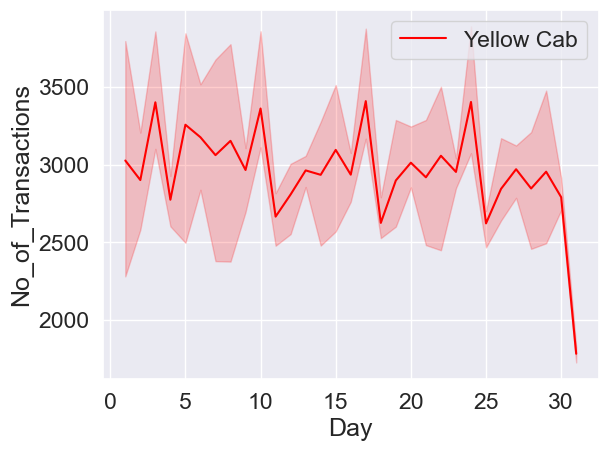

In [64]:
daily_yellow = yellow_data.groupby(['Year','Day']).agg(No_of_Transactions=('Transaction ID','count')).reset_index()
print(daily_yellow)

sns.set_style('darkgrid')
sns.lineplot(x='Day', y='No_of_Transactions', data=daily_yellow, color='red', label='Yellow Cab')

---

__Customer Analysis__

__Customer growth -__

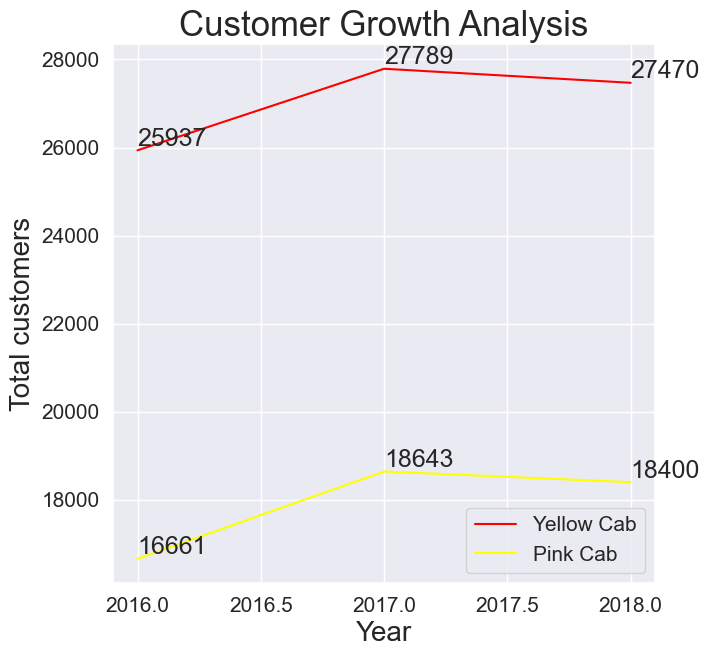

In [63]:
# Data needed for analysis
cust_gro_yellow = yellow_data.groupby('Year').agg({'Customer ID':'nunique'}).reset_index()
cust_gro_pink = pink_data.groupby('Year').agg({'Customer ID':'nunique'}).reset_index()

# Visualization
plt.figure(figsize=(7,7))
sns.lineplot(data=cust_gro_yellow, x='Year', y='Customer ID', color='red', label='Yellow Cab')
sns.lineplot(data=cust_gro_pink, x='Year', y='Customer ID', color='yellow', label='Pink Cab')
plot(xlabel='Year', ylabel='Total customers', title='Customer Growth Analysis')
annotation_line(x='Year', y='Customer ID', data=cust_gro_yellow, offset=100)
annotation_line(x='Year', y='Customer ID', data=cust_gro_pink, offset= 100)

In [41]:
cust_gro_yellow['Year'][1]

2017

__Customer distribution -__

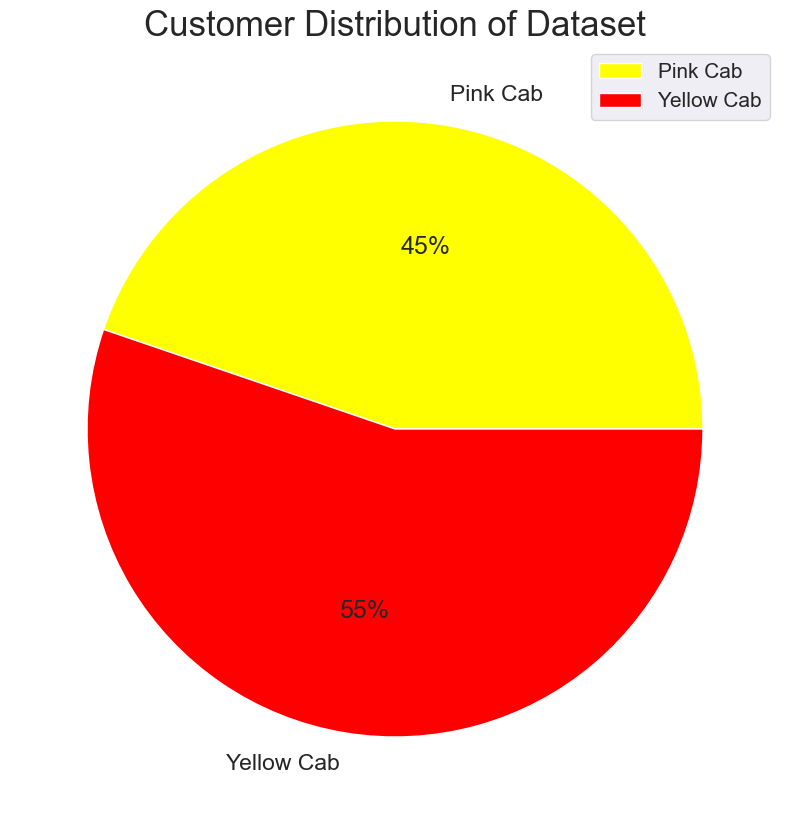

In [62]:
# Data needed for analysis
cust_data = combined_data[['Customer ID', 'Company']].groupby('Company').agg({'Customer ID':'nunique'}).reset_index()

# Visualization
plt.figure(figsize=(10,10))
plt.pie(cust_data['Customer ID'], labels=cust_data['Company'], colors=['yellow', 'red'], autopct="%.0f%%")
plot(title='Customer Distribution of Dataset')

__Per City Customer -__

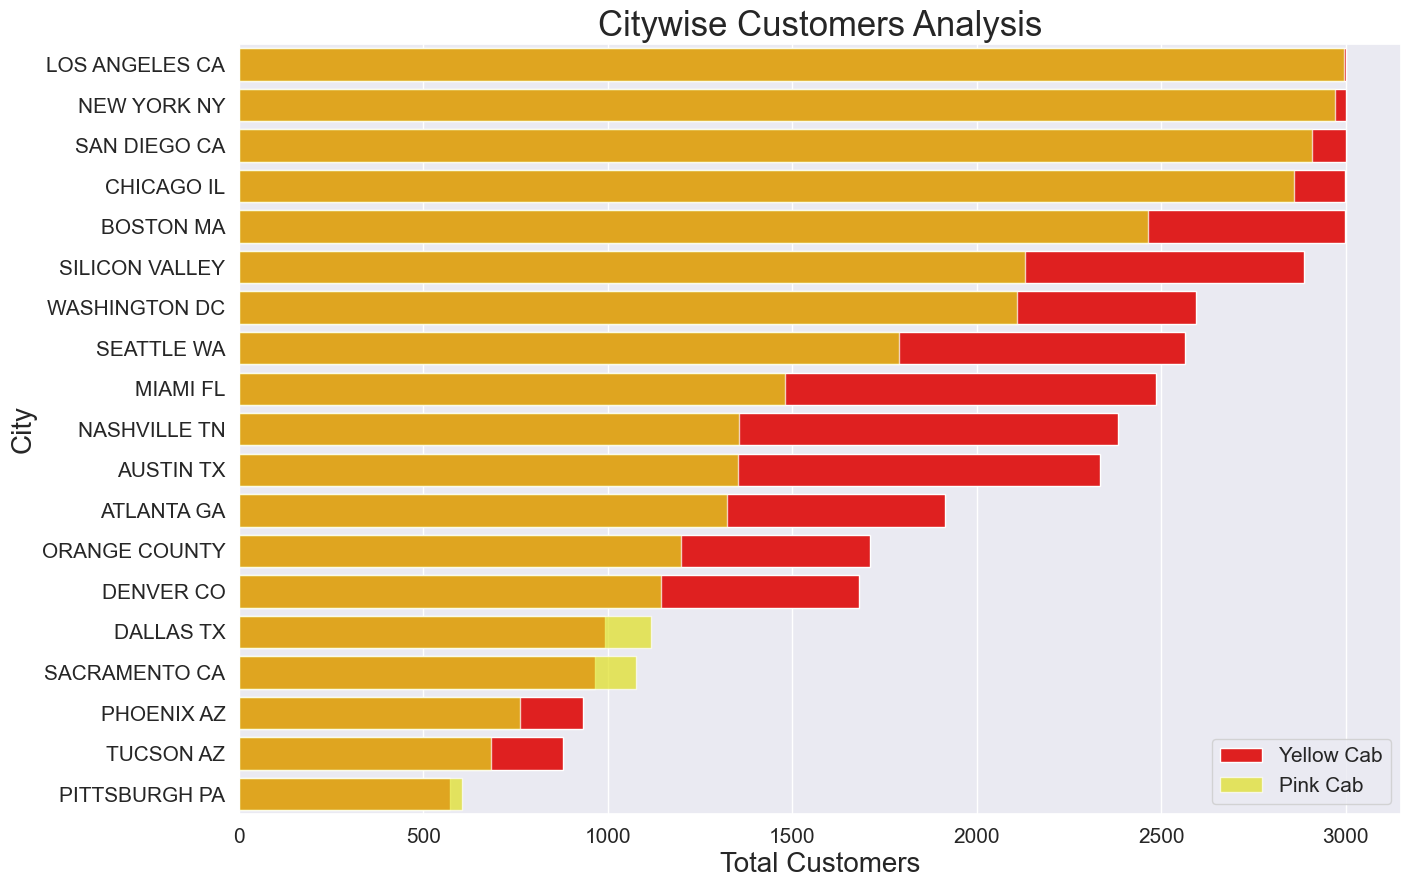

In [57]:
# Data needed for analysis
cust_city_yellow = yellow_data.groupby('City').\
agg(yellow_cab_customers=('Customer ID','nunique')).sort_values('yellow_cab_customers', ascending=False)
cust_city_pink = pink_data.groupby('City').\
agg(pink_cab_customers= ('Customer ID','nunique')).sort_values('pink_cab_customers', ascending=False)

# Visualization
plt.figure(figsize=(15,10))
m =sns.barplot(y=cust_city_yellow.index, x='yellow_cab_customers', orient="h", data=cust_city_yellow, color='red', label='Yellow Cab')
s =sns.barplot(y=cust_city_pink.index, x='pink_cab_customers', orient="h", data=cust_city_pink, color='yellow', label='Pink Cab', alpha=0.7)
plot(xlabel='Total Customers', ylabel='City', title = 'Citywise Customers Analysis')

---

__Geographic location analysis__

__Each city customer -__

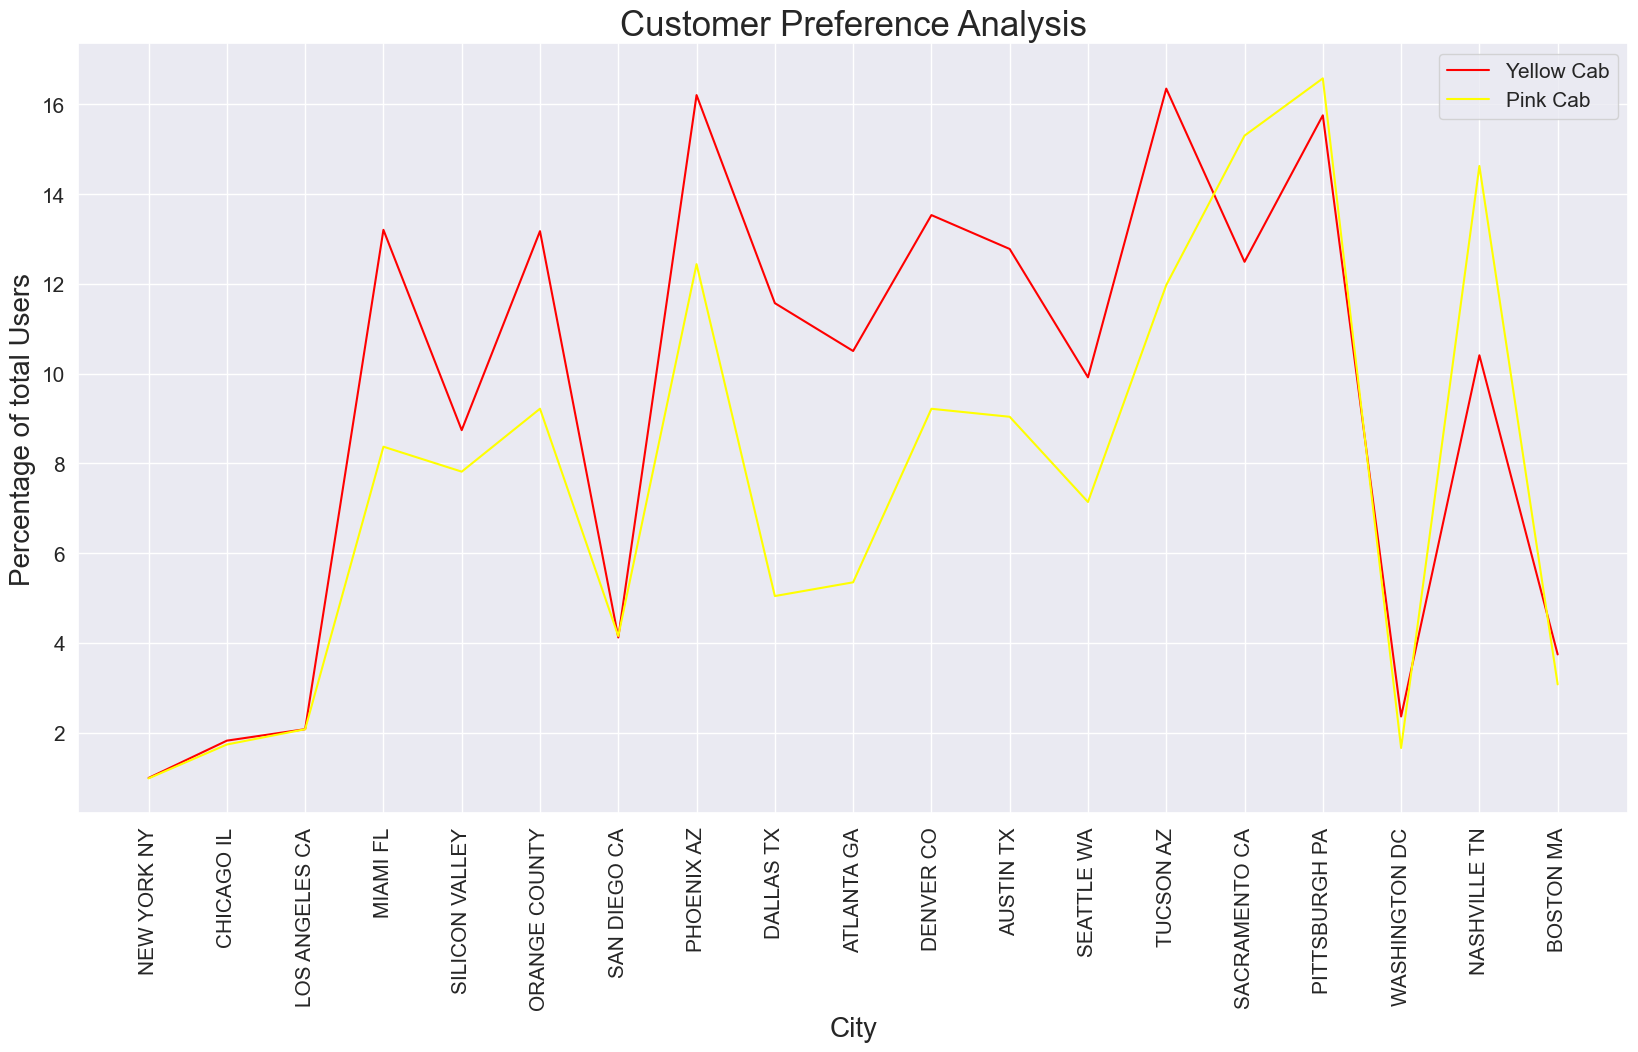

In [58]:
# Data needed for analysis
each_city_customers = city[['City','Users']].merge(cust_city_yellow, on='City').merge(cust_city_pink,on='City')
each_city_customers['Yellow Cab users(%)'] = each_city_customers['yellow_cab_customers'] * 100/ each_city_customers['Users']
each_city_customers['Pink Cab users(%)'] = each_city_customers['pink_cab_customers'] * 100/ each_city_customers['Users']

# Visualization
plt.figure(figsize=(20,10))
sns.lineplot(y='Yellow Cab users(%)', x='City', data = each_city_customers, color='red', label='Yellow Cab')
sns.lineplot(y='Pink Cab users(%)', x='City', data = each_city_customers, color='yellow', label='Pink Cab')
plt.xticks(rotation=90)
plot(xlabel='City', ylabel='Percentage of total Users', title='Customer Preference Analysis')

__Overall rides per city -__

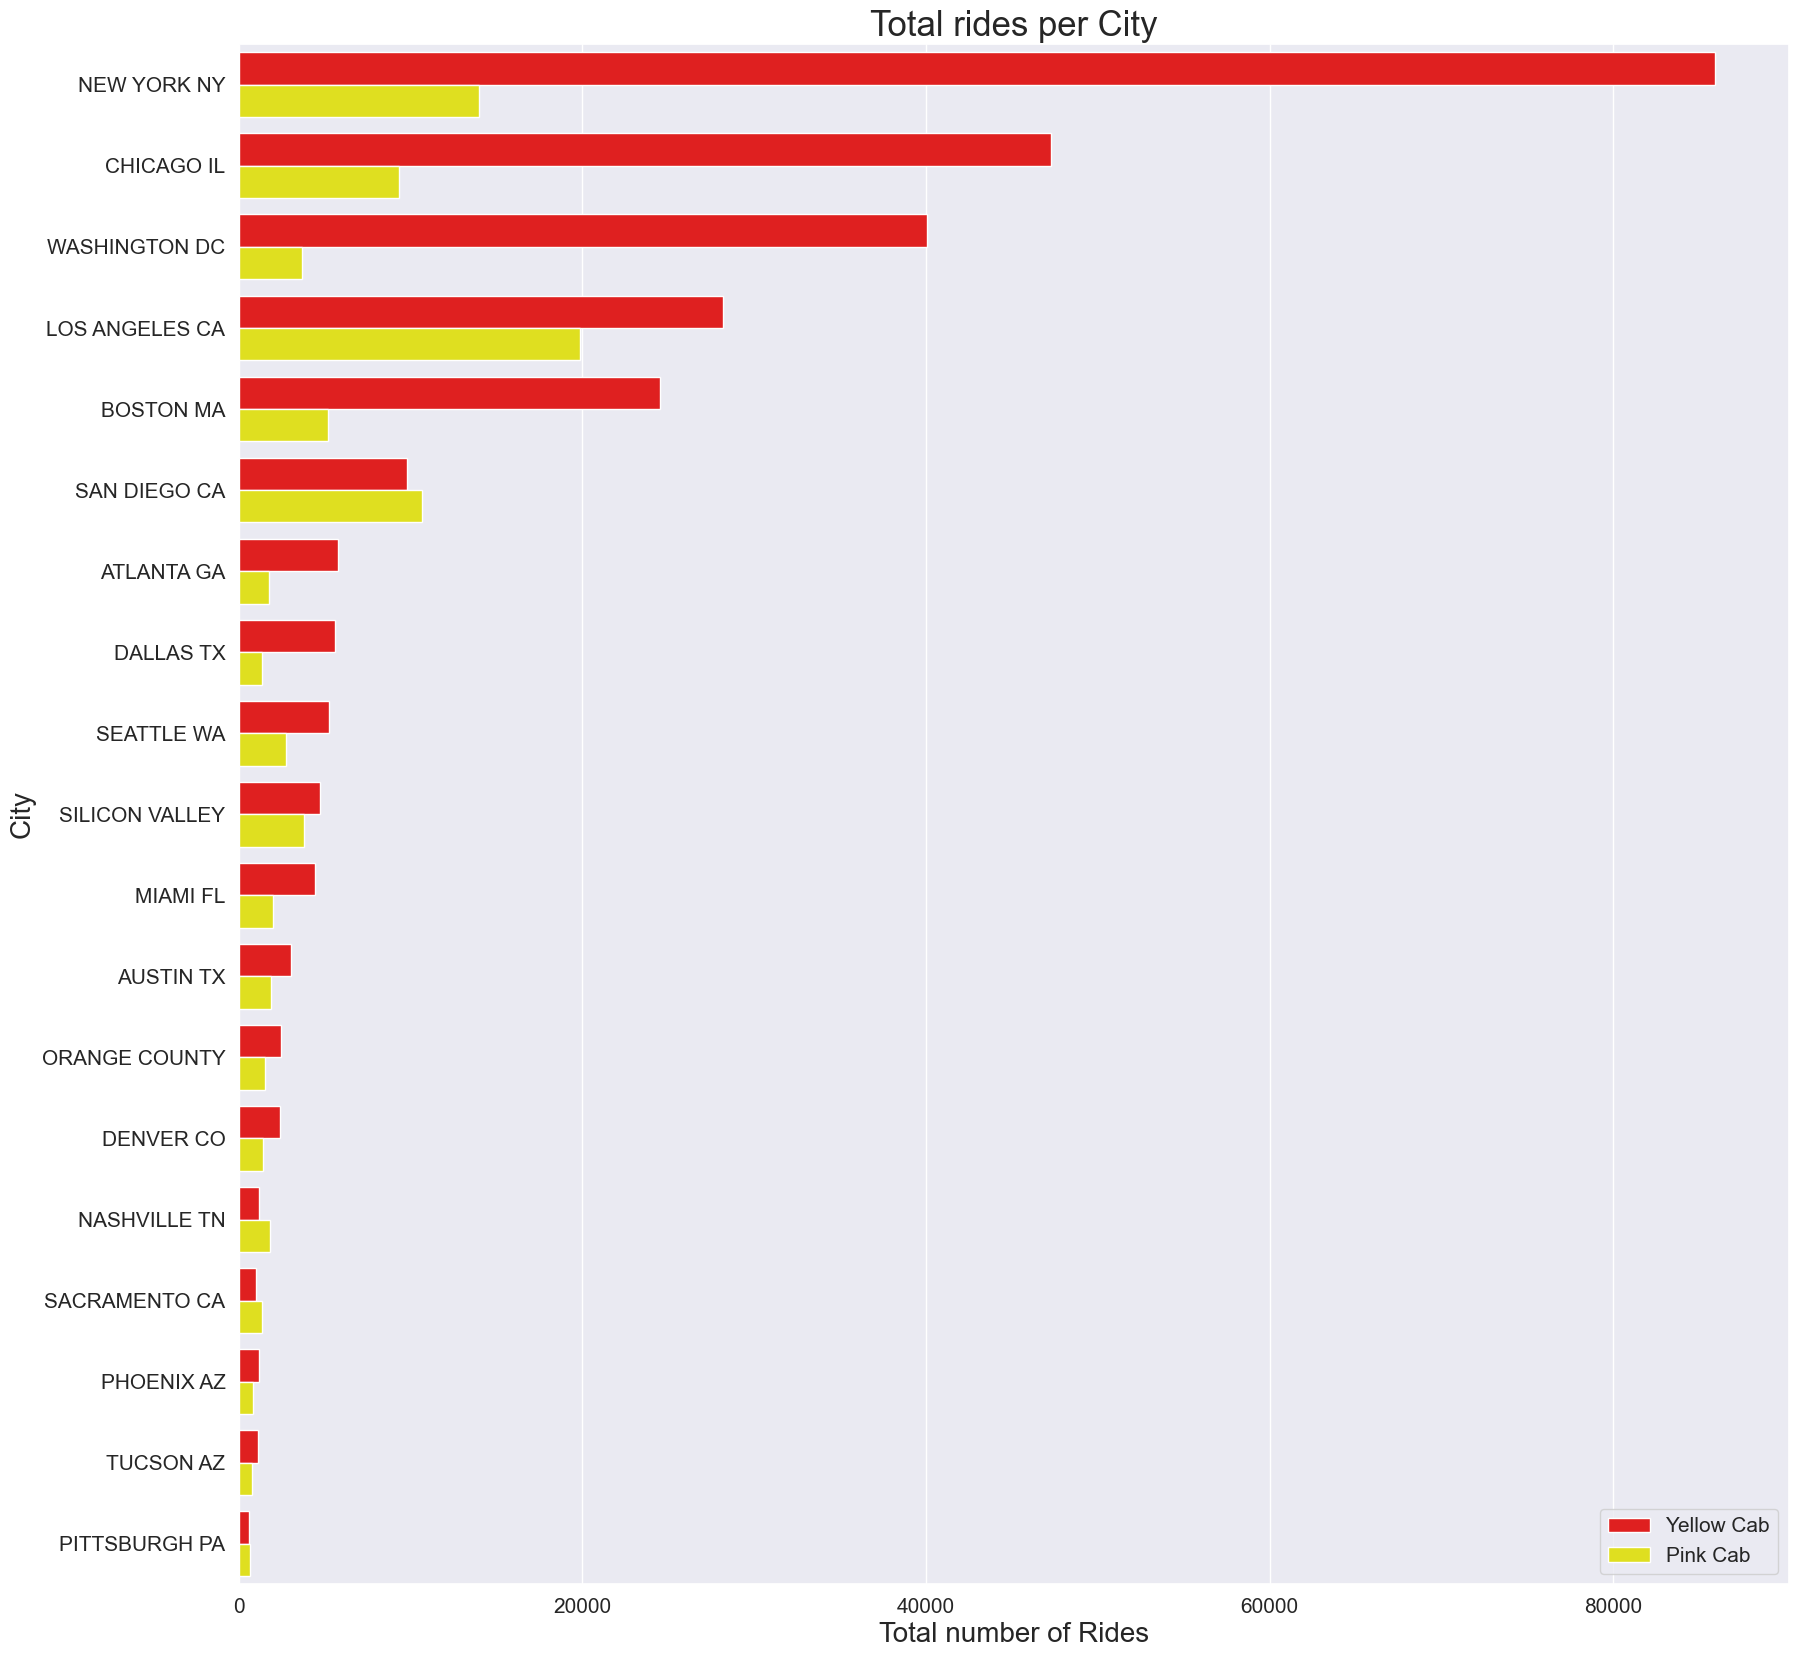

In [59]:
# Data needed for analysis
city_com_tran = combined_data[['City','Company','Transaction ID']].groupby(['City','Company']).\
agg(No_of_transactions= ('Transaction ID','count')).sort_values('No_of_transactions', ascending=False).reset_index()

# Visualization 
plt.figure(figsize=(20,20))
sns.barplot(y= 'City', x='No_of_transactions' , hue='Company', data=city_com_tran, orient="h", 
palette={'Yellow Cab':'red', 'Pink Cab': 'yellow'} )
plot(xlabel='Total number of Rides', ylabel='City', title='Total rides per City')

---

__Holiday Analysis__

__Average profit in holidays -__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '4th of July'),
  Text(1, 0, 'Christmas Day'),
  Text(2, 0, 'Christmas Eve'),
  Text(3, 0, 'Columbus Day'),
  Text(4, 0, 'Eastern Easter'),
  Text(5, 0, 'Juneteenth'),
  Text(6, 0, 'Labor Day'),
  Text(7, 0, 'Labor Day Weekend'),
  Text(8, 0, 'Martin Luther King, Jr. Day'),
  Text(9, 0, 'Memorial Day'),
  Text(10, 0, "New Year's Day"),
  Text(11, 0, 'New Year’s Eve'),
  Text(12, 0, 'Thanksgiving Day'),
  Text(13, 0, 'Thanksgiving Eve'),
  Text(14, 0, 'Valentine’s Day'),
  Text(15, 0, 'Veterans Day'),
  Text(16, 0, "Washington's Birthday"),
  Text(17, 0, 'Western Easter')])

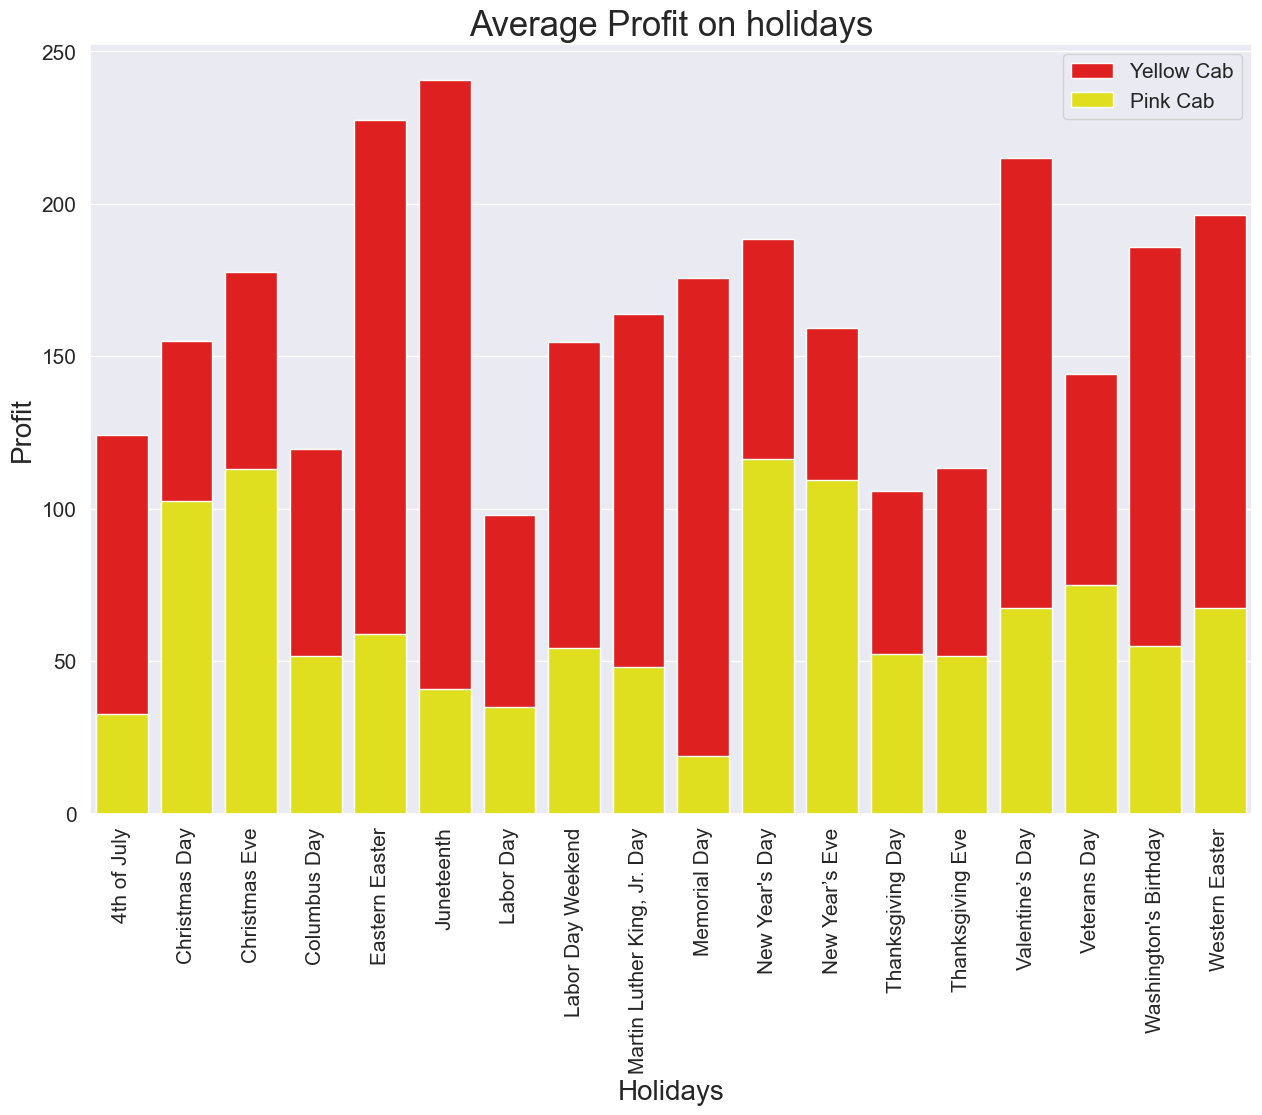

In [60]:
# Data needed for analysis
holiday_merge = combined_data.merge(US_holidays, left_on='Date of Travel', right_on='Date').sort_values('Date of Travel')
yellow_holiday = holiday_merge[holiday_merge['Company']=='Yellow Cab']
pink_holiday = holiday_merge[holiday_merge['Company']=='Pink Cab']
profit_holiday_yellow = yellow_holiday.groupby('Holiday').agg({'Profit':'mean', 'Transaction ID':'count'}).reset_index()
profit_holiday_pink = pink_holiday.groupby('Holiday').agg({'Profit':'mean', 'Transaction ID':'count'}).reset_index()

# Visualization
plt.figure(figsize=(15,10))
sns.barplot(data=profit_holiday_yellow, x='Holiday', y='Profit', color='red', label='Yellow Cab')
sns.barplot(data=profit_holiday_pink, x='Holiday', y='Profit', color='yellow', label='Pink Cab')
plot(xlabel='Holidays', ylabel='Profit', title='Average Profit on holidays')
plt.xticks(rotation = 90)

__Preferable customer holidays -__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '4th of July'),
  Text(1, 0, 'Christmas Day'),
  Text(2, 0, 'Christmas Eve'),
  Text(3, 0, 'Columbus Day'),
  Text(4, 0, 'Eastern Easter'),
  Text(5, 0, 'Juneteenth'),
  Text(6, 0, 'Labor Day'),
  Text(7, 0, 'Labor Day Weekend'),
  Text(8, 0, 'Martin Luther King, Jr. Day'),
  Text(9, 0, 'Memorial Day'),
  Text(10, 0, "New Year's Day"),
  Text(11, 0, 'New Year’s Eve'),
  Text(12, 0, 'Thanksgiving Day'),
  Text(13, 0, 'Thanksgiving Eve'),
  Text(14, 0, 'Valentine’s Day'),
  Text(15, 0, 'Veterans Day'),
  Text(16, 0, "Washington's Birthday"),
  Text(17, 0, 'Western Easter')])

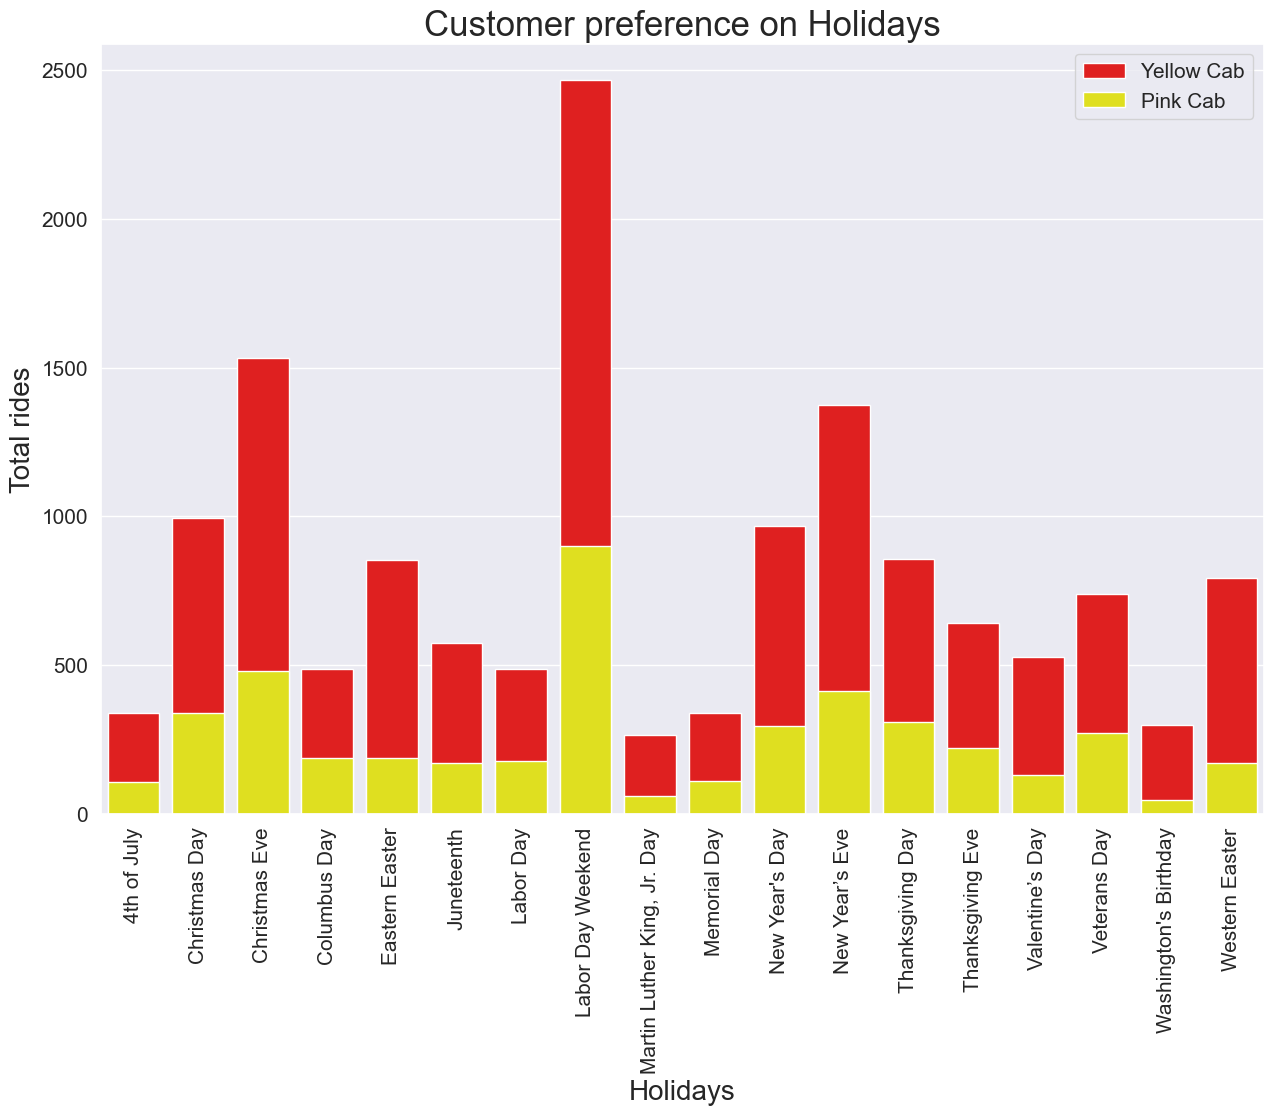

In [61]:
# Visualization
plt.figure(figsize=(15,10))
sns.barplot(data=profit_holiday_yellow, x='Holiday', y='Transaction ID', color='red', label='Yellow Cab')
sns.barplot(data=profit_holiday_pink, x='Holiday', y='Transaction ID', color='yellow', label='Pink Cab')
plot(xlabel='Holidays', ylabel='Total rides', title='Customer preference on Holidays')
plt.xticks(rotation = 90)

---

# Exploratory Data Analysis Recommendations and Hypothesis results

__The summary of the EDA approach and its key insights are discussed below:__

__Profit Analysis:__ In this analysis, we compared annual profit, quarterly profit, per Kilometer profit, per ride profit and results show that the Yellow Cab is performing great with 8 times more profit than Pink cab. 
__Yellow Cab__


__Number of rides Analysis:__ In this analysis, we compared average monthly rides, average daily rides which proves that Yellow Cab is more popular. 
__Yellow Cab__


__Customer Analysis:__ In this analysis, we compared customer reach and percentage of reach of total cab users and results show that Yellow Cab has more customers than Pink cab. 
__Yellow Cab__


__Geographic Location Analysis:__ In this analysis, we compared citywise total rides and customer reach. The output is that the Yellow Cab is performing better with 16 cities out of 19. 
__Yellow Cab__


__Holiday Analysis:__ In this analysis, we compared profit and rides on holidays for both the companies which brings us to the decision that the Yellow Cab is more popular than Pink cab on holidays too. 
__Yellow Cab__

__We recommend, the investment should be done in _Yellow Cab_ company.__